Downloading and Importing Dependencies

In [2]:
# For generating GIF of result
!pip install imageio
!pip install git+https://github.com/tensorflow/docs 

^C


In [3]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

  Cloning https://github.com/tensorflow/docs to c:\users\ayush\appdata\local\temp\pip-req-build-bqzek29r
  Resolved https://github.com/tensorflow/docs to commit ba879887790ded183c04540d5386df4962f48eeb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\ayush\AppData\Local\Temp\pip-req-build-bqzek29r'


Loading and Preparing Dataset

In [4]:
#Loading Data
(x_train, y_train), (_,_) = tf.keras.datasets.mnist.load_data()

#Reshaping and Normalising training data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
#Normalising between [-1,1]
x_train = (x_train-127.5)/127.5

#Setting BATCH_SIZE and BUFFER_SIZE
BUFFER_SIZE = 60000
BATCH_SIZE = 256

#Shuffling and dividing data in batches
x_train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Defining Generator

In [12]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense((7*7*256), use_bias = False, input_shape = (100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Testing Our Generator

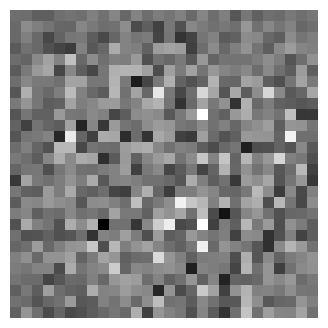

In [16]:
gen_model = generator_model()

noise = tf.random.normal([1, 100])
generated_image = gen_model(noise, training = False)

plt.figure(figsize = (4,4))
plt.axis(False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')